## Table of Contents

- Goals
- Data 
  - Load the Data
  - Data Info
- Cleaning the data
  - Removing all rows with NaN values
  - Converting the Amount column to int datatype
  - Filter out certain values in the League and Party columns
- Exploring the Data
  - Main Focus
  - Amount by League
  - Amount by Party 
  - Amount by Party & Election Year
  - Major Limitations
- Final Thoughts

## Goals

This project will focus on political donations from team owners and comissioners from the following leagues (NBA, NFL, MLB, WNBA, NASCAR, and NHL). The goals for this project are stated below:
- Understand the data we are working with
- Clean the data to make it more readable and to use in our analysis
- Develop some questions for our data
- Analyze variables to find trends, patterns and gain insights on our questions

### Data

The data was downloaded from Github:
    
- https://github.com/fivethirtyeight/data/blob/master/sports-political-donations/sports-political-donations.csv

Feel Free to check out this article which features the data that we will be using from FiveThirtyEight:
- https://fivethirtyeight.com/features/inside-the-political-donation-history-of-wealthy-sports-owners/

#### Loading our Data

Let's import the necessary libraries that will be used for this project. We will use Pandas to get our data and display
the first few rows of the dataset!

In [1]:
#Sets this up with some cool features!
%matplotlib notebook 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
donations_data = pd.read_csv('political_donations.csv')
donations_data.head()

,Owner,Team,League,Recipient,Amount,Election Year,Party
0,Adam Silver,Commissioner,NBA,WRIGHT 2016,"$4,000",2016,Democrat
1,Adam Silver,Commissioner,NBA,BIDEN FOR PRESIDENT,"$2,800",2020,Democrat
2,Adam Silver,Commissioner,NBA,CORY 2020,"$2,700",2020,Democrat
3,Adam Silver,Commissioner,NBA,Kamala Harris for the People,"$2,700",2020,Democrat
4,Adam Silver,Commissioner,NBA,Win The Era PAC,"$2,700",2020,Democrat


#### Data Info

Here are some findings on the data so far:
- 7 columns and 2,798 rows for our data 
- All columns have an object datatype except election year which is int64
- There are some missing data in the Party column which we can remove later on
- The column names are readable and do not need any modifications
- The amount column can be changed to int64 for visualizations involving quanititative values 
- Cut down on some column values for the following columns: Amount, Party, League to reduce our dataset

In [117]:
donations_data.columns # We have a total of 7 columns to use in our project


Index(['Owner', 'Team', 'League', 'Recipient', 'Amount', 'Election Year',
       'Party'],
      dtype='object')

In [118]:
donations_data.info() #All Dtypes as Object except for election year which is int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2798 entries, 0 to 2797
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Owner          2798 non-null   object
 1   Team           2798 non-null   object
 2   League         2798 non-null   object
 3   Recipient      2798 non-null   object
 4   Amount         2798 non-null   object
 5   Election Year  2798 non-null   int64 
 6   Party          2789 non-null   object
dtypes: int64(1), object(6)
memory usage: 153.1+ KB


In [175]:
# Checking for missing data
donations_data.isnull().sum()

Owner            0
Team             0
League           0
Recipient        0
Amount           0
Election Year    0
Party            9
dtype: int64

In [176]:
print(len(donations_data)) # Shows how many in rows in total for our data

2798


In [270]:
print(donations_data['Party'].unique())
print(donations_data.Team.value_counts())

['Democrat' nan 'Bipartisan' 'Republican'
 'Bipartisan, but mostly Republican' 'Bipartisan, but mostly Democratic'
 'Independent']
San Francisco Giants                        219
Chicago Sky                                 179
Miami Heat                                  178
Orlando Magic                               116
Portland Trail Blazers, Seattle Seahawks    108
                                           ... 
Carolina Panthers                             1
Kansas City Royals                            1
New Orleans Pelicans, New Orleans Saints      1
Baltimore Ravens                              1
New York Yankees                              1
Name: Team, Length: 115, dtype: int64


In [3]:
donations_data['Amount'] = donations_data['Amount'].str.replace('$', '', regex=True) #Get rid of $ signs to avoid any ValueErrors
donations_data['Amount'] = donations_data['Amount'].str.replace(',', '',regex=True) #Get rid of $ signs to avoid any ValueErrors
donations_data['Amount'] = donations_data['Amount'].astype('int64')
donations_data.dtypes

Owner            object
Team             object
League           object
Recipient        object
Amount            int64
Election Year     int64
Party            object
dtype: object

In [4]:
donations_data = donations_data.dropna() #Drops all rows that have a NaN value
donations_data.head()

,Owner,Team,League,Recipient,Amount,Election Year,Party
0,Adam Silver,Commissioner,NBA,WRIGHT 2016,4000,2016,Democrat
1,Adam Silver,Commissioner,NBA,BIDEN FOR PRESIDENT,2800,2020,Democrat
2,Adam Silver,Commissioner,NBA,CORY 2020,2700,2020,Democrat
3,Adam Silver,Commissioner,NBA,Kamala Harris for the People,2700,2020,Democrat
4,Adam Silver,Commissioner,NBA,Win The Era PAC,2700,2020,Democrat


#### Filtering Values

We will modify our Amount column to only donation amounts less than $100,000. By doing this, it will trim down the number of rows that we will be using in our dataset.

In [5]:
donations_data = donations_data[donations_data['Amount'] <= 100000]
print(donations_data.League.unique())
print(donations_data.Party.unique())
print(len(donations_data))

['NBA' 'MLB' 'NHL' 'NFL' 'NASCAR' 'WNBA' 'MLB, NHL' 'NBA, NHL'
 'NBA, NFL, NHL' 'NBA, NFL' 'NBA, WNBA' 'NBA, MLB' 'MLB, NASCAR'
 'NHL, NFL' 'MLB, WNBA' 'NBA, NHL, WNBA']
['Democrat' 'Bipartisan' 'Republican' 'Bipartisan, but mostly Republican'
 'Bipartisan, but mostly Democratic' 'Independent']
2713


Limit the League column to these choices only: NBA, NFL, NHL, MLB, NASCAR, WNBA

In [6]:
donations_data = donations_data[donations_data['League'] != 'MLB, NHL']
donations_data = donations_data[donations_data['League'] != 'NBA, NHL']
donations_data = donations_data[donations_data['League'] != 'NBA, NFL, NHL']
donations_data = donations_data[donations_data['League'] !=  'NBA, NFL']
donations_data = donations_data[donations_data['League'] != 'NBA, WNBA']
donations_data = donations_data[donations_data['League'] !=  'NBA, MLB']
donations_data = donations_data[donations_data['League'] != 'MLB, NASCAR']
donations_data = donations_data[donations_data['League'] !=  'NHL, NFL']
donations_data = donations_data[donations_data['League'] != 'MLB, WNBA']
donations_data = donations_data[donations_data['League'] != 'NBA, NHL, WNBA']
print(donations_data.League.unique())
print(len(donations_data)) #Trimmed down again to 2265 rows!


['NBA' 'MLB' 'NHL' 'NFL' 'NASCAR' 'WNBA']
2265


Now, let's trim down the Party column to these values: Democrat, Republican, Independent, Bipartisan

In [8]:
donations_data = donations_data[donations_data['Party'] != 'Bipartisan, but mostly Republican']
donations_data = donations_data[donations_data['Party'] != 'Bipartisan, but mostly Democratic']
donations_data = donations_data[donations_data['Party'] != 'Independent'] #Only because there is literally no data to make any conclusions!
print(donations_data.Party.unique())
print(len(donations_data)) # Now down to 2,227
#print(donations_data.Team.value_counts())
print(donations_data.Team.value_counts())

['Democrat' 'Bipartisan' 'Republican']
2225
San Francisco Giants    203
Chicago Sky             176
Miami Heat              172
Orlando Magic           107
Cleveland Browns         96
                       ... 
Baltimore Ravens          1
New York Yankees          1
Premium Motorsports       1
Boston Celtics            1
Kansas City Royals        1
Name: Team, Length: 99, dtype: int64


#### Exploring the Data

##### Main Focus

In order to solve your questions above, we need to first take a look at all of our columns data and see how it may influence
our data, starting with the owner and league columns:

In [296]:
print(donations_data.Team.unique())
donations_data.Team.count() # That's a lot of Teams!

['Commissioner' 'Los Angeles Dodgers' 'Arizona Coyotes' 'Tennessee Titans'
 'Richard Petty Motorsports' 'Los Angeles Angels of Anaheim'
 'Atlanta Falcons' 'Pittsburgh Steelers' 'Dallas Wings'
 'St. Louis Cardinals' 'Vegas Golden Knights' 'Las Vegas Aces'
 'Pittsburgh Pirates' 'Texas Rangers' 'Miami Marlins'
 'Tampa Bay Buccaneers' 'San Francisco Giants' 'Colorado Rockies'
 'Boston Bruins' 'Chip Ganassi Racing' 'New York Jets'
 'Kansas City Chiefs' 'Oklahoma City Thunder' 'Minnesota Wild'
 'Houston Texans' 'Orlando Magic' 'Cleveland Cavaliers'
 'Washington Football Team' 'Philadelphia Flyers' 'Seattle Kraken'
 'Seattle Storm' 'Los Angeles Chargers' 'San Francisco 49ers'
 'Los Angeles Kings' 'New York Mets' 'Utah Jazz' 'Stewart Haas Racing'
 'Chicago Bears' 'New York Yankees' 'Chicago Sky' 'Anaheim Ducks'
 'Nashville Predators' 'Roush Fenway Racing' 'Milwaukee Bucks'
 'Indianapolis Colts' 'Los Angeles Lakers' 'Spire Motorsports'
 'Tampa Bay Lightning' 'Philadelphia Eagles' 'Dallas Cowboy

2227

In [297]:
print(donations_data.League.value_counts())
# Most of the data is from the MLB, surprising isn't it?

MLB       712
NBA       440
NFL       429
NHL       310
WNBA      262
NASCAR     74
Name: League, dtype: int64


### Exploring the Data 

Now since the data is all cleaned up, we can start making visualizations using Seaborn & Matplotlib libraries!

#### Main Focus

This is we want to solve with our data below:
- Relationship between Donation Amount by League
- Relationship between Donation Amount by Party
- Relationship between Donation Amount by Party & Election Year
- Relationship between Donation Amount by Teams & Leagues

First though, let's take a look at the proportion of the following data:
   - Political Party
   - League
   - Owner 
   - Election Year
And Statistical Info on the Amount column(min, max, mean, etc.)!

In [298]:
donations_data.Party.value_counts(normalize=True)
# Our Dataset has a majority of donations for Republican Candidates (58.3%) which could cause the data to skew in their direction


Republican     0.591379
Democrat       0.327795
Bipartisan     0.079928
Independent    0.000898
Name: Party, dtype: float64

In [299]:
donations_data.League.value_counts(normalize=True)
# Interestingly enough, most of our data is from Owners that are from the MLB(26.6%), followed by NBA & NFL

MLB       0.319713
NBA       0.197575
NFL       0.192636
NHL       0.139201
WNBA      0.117647
NASCAR    0.033229
Name: League, dtype: float64

In [300]:
donations_data.Owner.value_counts(normalize=True)
# Charles Johnson, the owner of the San Francisco Giants (MLB) takes up most of the data at a measly 7.6% since there
# are a bunch of owners & commissioners(i.e Adam Silver from NBA) that are in this dataset

Charles Johnson           0.088460
Micky Arison              0.078132
John Rogers               0.065559
Dan DeVos                 0.048047
Jimmy and Susan Haslam    0.043107
                            ...   
Jon Ledecky               0.000449
John Sherman              0.000449
Alan Smolinisky           0.000449
Jerry Bruckheimer         0.000449
Neil Leibman              0.000449
Name: Owner, Length: 138, dtype: float64

In [30]:
donations_data['Election Year'].value_counts(normalize=True)
# Very even proportions with most of the donations from the 2018 Election at 35.6%!

2018    0.356042
2016    0.338473
2020    0.305486
Name: Election Year, dtype: float64

#### Donation Amount by League 

Before we look at the Amount by League, let's look at some summary statistics for the Amount column below:
Using the describe method, it shows the values with an "e+" symbol next to them meaning an exponent of something (For example e+03 means e*10 to the third power) . In order to reduce the confusion with the values,
we can print them separately below this line of code.

In [22]:
donations_data.Amount.describe()

count    2.789000e+03
mean     1.653989e+04
std      7.767169e+04
min      3.600000e+01
25%      2.700000e+03
50%      5.000000e+03
75%      5.600000e+03
max      1.850000e+06
Name: Amount, dtype: float64

In [301]:
print(donations_data.Amount.mean()) # Average Donation Amount
print(donations_data.Amount.min()) #Smallest Donation
print(donations_data.Amount.max()) #Largest Donation
print(donations_data.Amount.count()) #There were 2,789 donations in total
print(donations_data.Amount.sum()) #The total donations amount was over $46,000,000 dollars!

7730.271665918276
36
100000
2227
17215315


Let's look at the League Proportion with the use of a pie chart to see where most of the data is coming from:

As seen below, we can see that the majority of our data will be coming from MLB with 32%, followed by NBA and NFL with 20 and 19 percent respectively.

[74, 262, 310, 429, 438, 712]
['NASCAR', 'WNBA', 'NHL', 'NFL', 'NBA', 'MLB']


<IPython.core.display.Javascript object>


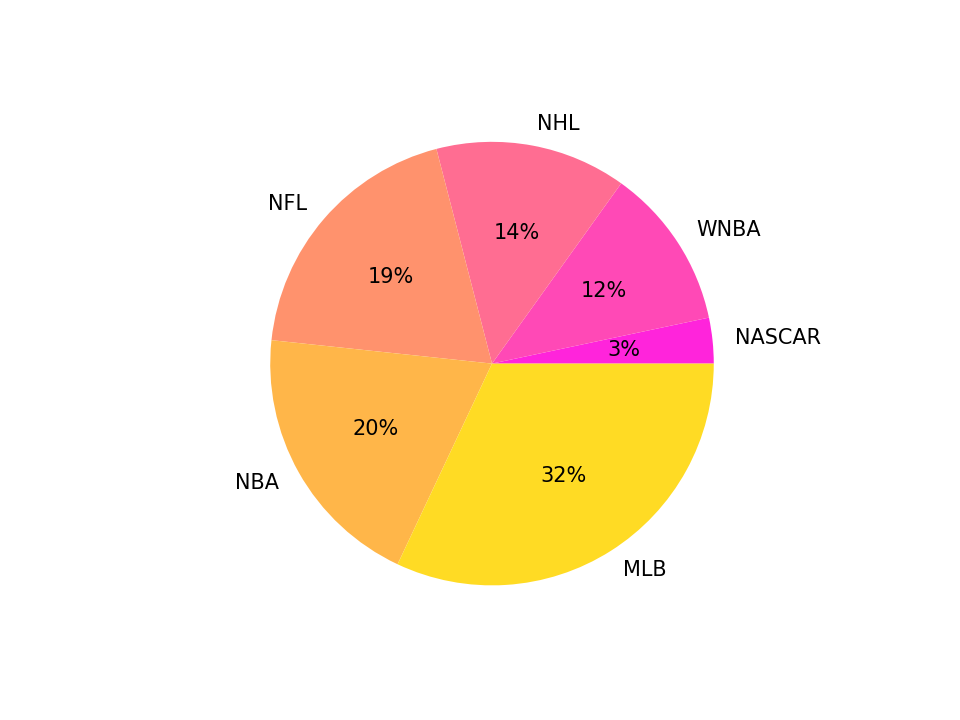

([<matplotlib.patches.Wedge at 0x2a2e4d1f8e0>,
 [Text(1.094001112635573, 0.11472386653233241, 'NASCAR'),
  Text(0.9207713420806866, 0.6018140373927245, 'WNBA'),
  Text(0.20154072770838333, 1.081379366861961, 'NHL'),
  Text(-0.8330327296321428, 0.7183707060853898, 'NFL'),
  Text(-0.9586527310066827, -0.5394302006130441, 'NBA'),
  Text(0.5894094301288995, -0.9287607461963098, 'MLB')],
 [Text(0.5967278796194034, 0.0625766544721813, '3%'),
  Text(0.5022389138621925, 0.3282622022142133, '12%'),
  Text(0.10993130602275453, 0.589843291015615, '14%'),
  Text(-0.45438148889025964, 0.39183856695566716, '19%'),
  Text(-0.5229014896400087, -0.29423465487984224, '20%'),
  Text(0.3214960527975815, -0.5065967706525326, '32%')])

In [9]:
league_values = list(donations_data.League.value_counts().sort_values())
league_names = ['NASCAR', 'WNBA', 'NHL', 'NFL', 'NBA', 'MLB']
print(league_values)
print(league_names)

palette_color = sns.color_palette('spring')
plt.pie(league_values, labels=league_names, colors=palette_color, autopct='%.0f%%', textprops={'fontsize': 10})

Let's create a boxplot of the League and Amount columns below:

Since there are lots of outliers, we will change our boxplot to a boxenplot to show more details.

<IPython.core.display.Javascript object>


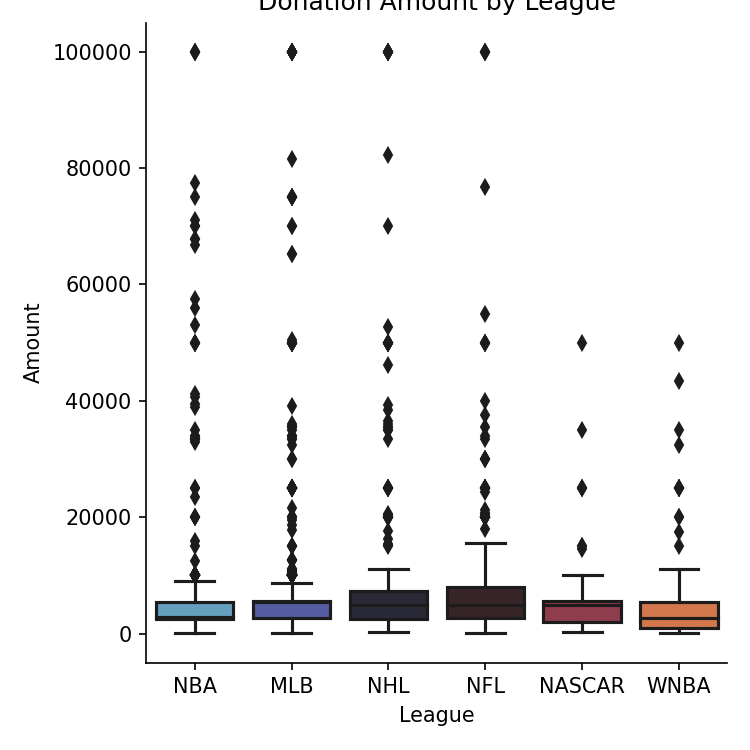

Text(0.5, 1.0, 'Donation Amount by League')

In [10]:
sns.catplot(data=donations_data, x="League", y="Amount", kind="box", palette='icefire')
plt.title("Donation Amount by League")

By using a boxenplot(a variation of the Boxplot used above), we can see the averages for each League more clearly despite the overwhelming amount of outliers that are shown in the visualization below.

Here are some insights on this boxplot:
  - The data from the NASCAR & WNBA area is more consistent with only 3 and 4 major outliers, on contrast with MLB and NFL
  where there are over 15-25 outliers!
  - Remove the outliers and you see MLB has the highest average donation of all major leagues, while NBA barely has the lowest average donation of all leagues

<IPython.core.display.Javascript object>


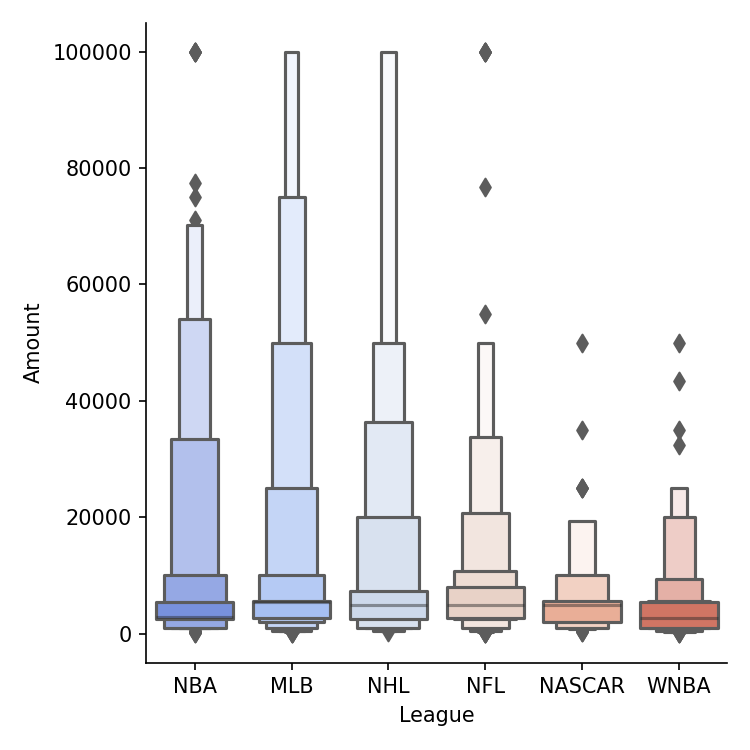

In [11]:
sns.catplot(data=donations_data, x='League', y='Amount', kind="boxen", palette='coolwarm', scale='linear')

#### Donation Amount by Political Party

To get a breakdown of how a Political Party influences donation amounts, let's first see how much is in each category using a countplot:

As shown below, most of the data is from the Republican party followed by Democrats.

<IPython.core.display.Javascript object>


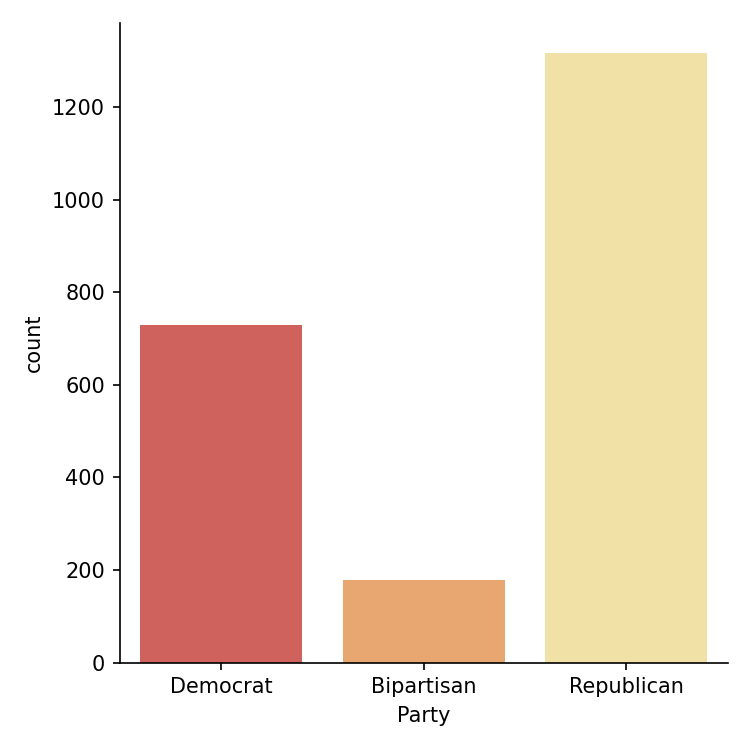

In [12]:
colors_spect = sns.color_palette('Spectral')
sns.catplot(data=donations_data, x='Party', kind='count', palette=colors_spect)

Now, let's make a swarmplot of Amounts by Party below:

We can see that there is lots of jitter across all Parties.
Additional Insights:
- Republicans got more donations that were worth over 100,000 than it's Democrat counterpart
- Most of the donations for both Democrats and Republicans are between 0 and 10,000
- Highest donation amounts for Bipartisans are around the 20,000 mark

<IPython.core.display.Javascript object>


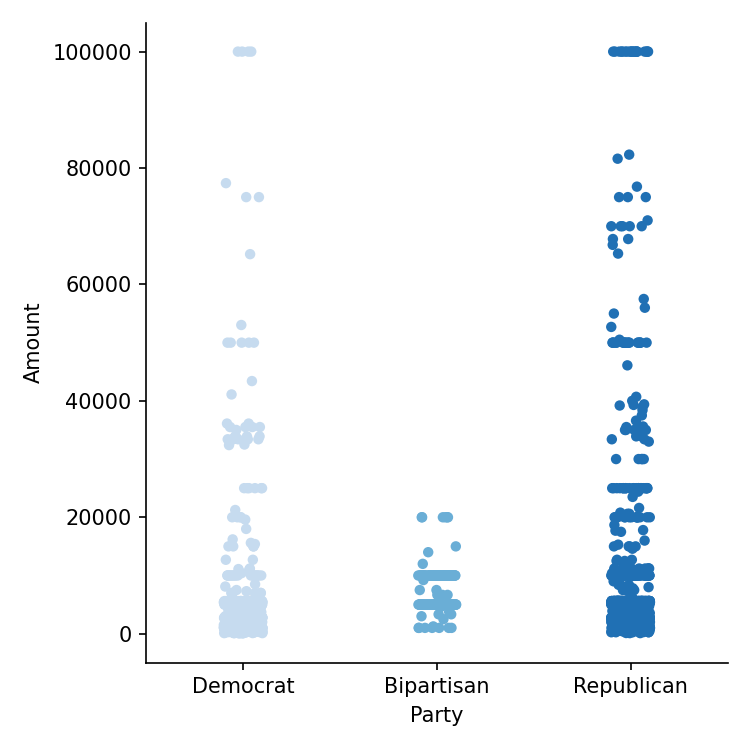

In [13]:
sns.catplot(data=donations_data, x="Party", y="Amount", palette='Blues')

#### Donation Amount by Political Party & Election Year

To see the statistics on how much money was donated per party per election year, first let's look at a visual to get a
breakdown of what years we are covering in our data:

Insights on this countplot of Election Year Values:
- All plots are evenly matched, with barely most of the data coming from the 2018 Election Year
- 2020 Election Year had the lowest amount of data, given this dataset was made during that year so that might explain why.

<IPython.core.display.Javascript object>


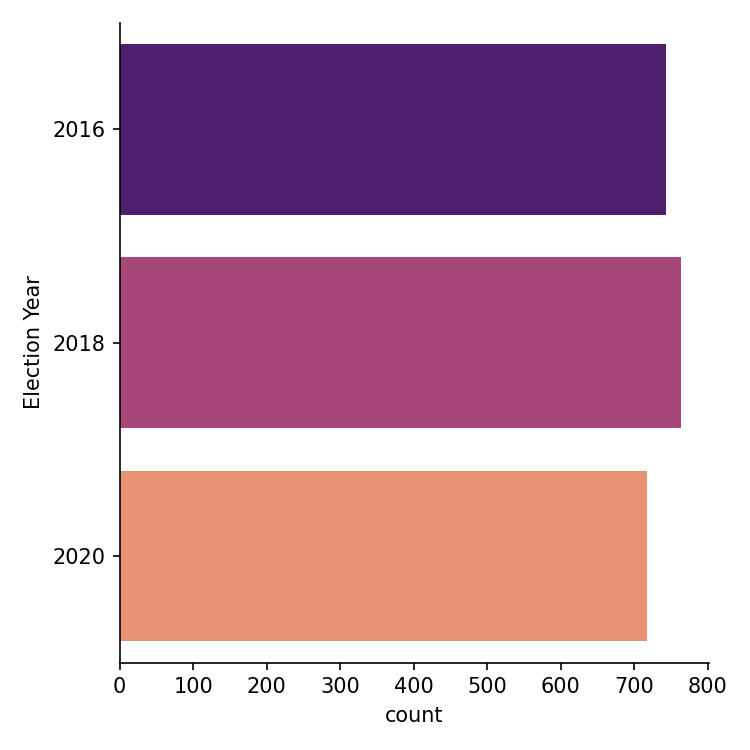

In [14]:
sns.catplot(data=donations_data, y='Election Year', kind='count', palette='magma')

Now, let's create a boxplot with major customizations that categorizes our Party and Amount Data by Election Year:

Insights below:
- There is no data for the Independent section for 2020 since there were no donations for that category
- Most of the outliers in the data is from Republicans due to the high amounts of donations for that Party
- Democrats tends to have smaller average donations than Republicans regardless of Election Year
- Bipartisan tends to have higher donation amount averages than Democrats except for 2020 where there are just outliers and no plot

<IPython.core.display.Javascript object>


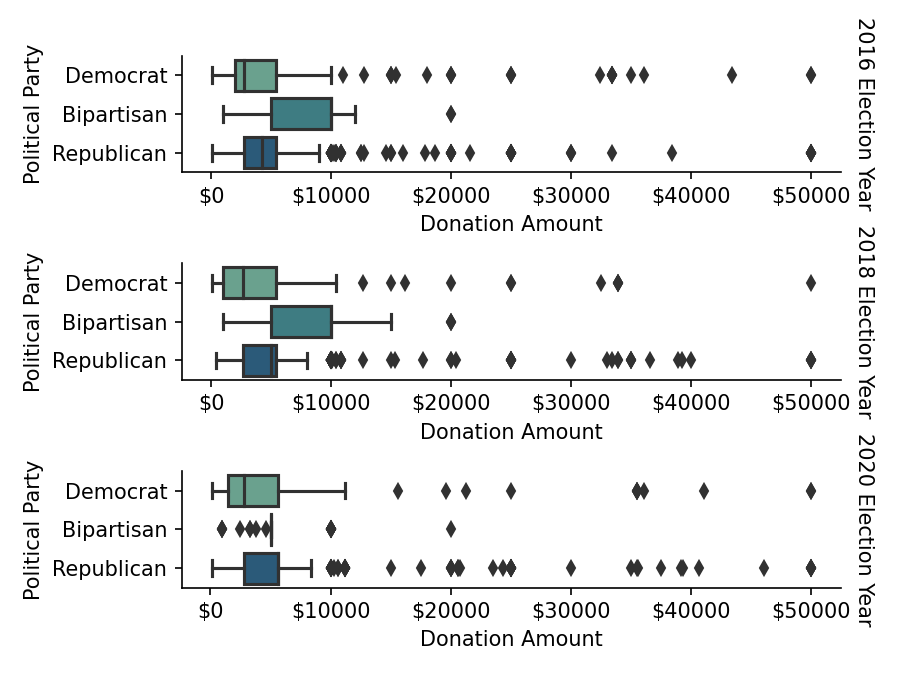

In [15]:
donations_trim = donations_data[donations_data['Amount'] <= 50000] #Only donation amounts that are at least $50,000 or less
g = sns.catplot(
    data=donations_trim,
    x="Amount", y="Party", row="Election Year",
    kind="box", orient="h",
    sharex=False, margin_titles=True,
    height=1.5, aspect=4, palette='crest',
)
g.set(xlabel="Donation Amount", ylabel="Political Party")
g.set_titles(row_template="{row_name} Election Year")
for ax in g.axes.flat:
    ax.xaxis.set_major_formatter('${x:.0f}')

#### Major Limitations

Here are some issues with our dataset:
- Teams, Recipient and Owners columns have too much unique(Over 90+ values)
- Data for certain categories are not even(i.e. Party) which causes certain values to take on a much greater emphasis than necessary
- There is only data for 3 election years 2016, 2018, 2020 (2 National & 1 Midterm Elections)


## Final Thoughts

Here are some things that can be improved for future analysis:
- Providing 4 election years instead of 3 (include 2014 Midterms!)
- Decrease amount of Teams & Owners in dataset or place them in separate datasets by league for better clarification
- Have a consistent range for Donation Amount in order to provide highest levels of accuracy on our findings
- Reduce the amount of recipients to get a better picture on where the majority of donations go towards